In [32]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [33]:
dataset = MNIST(root='data/',download = True)

In [34]:
len(dataset)

60000

In [35]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [36]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Lable :  5


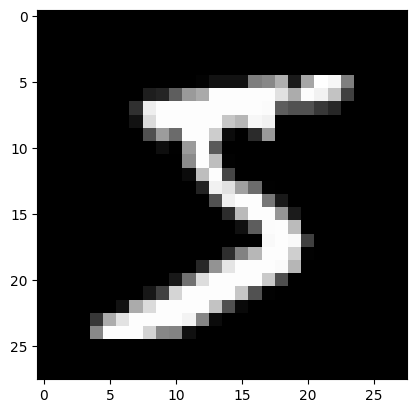

In [38]:
image, label = dataset[0]
plt.imshow(image,cmap='gray')
print('Lable : ',label)

Label :  3


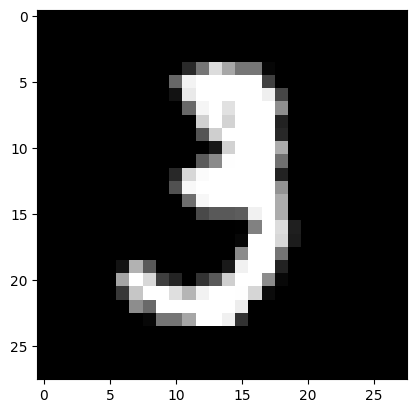

In [39]:
image,label = dataset[10]
plt.imshow(image,cmap='gray')
print('Label : ',label)

In [40]:
import torchvision.transforms as transforms

In [41]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [42]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [43]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


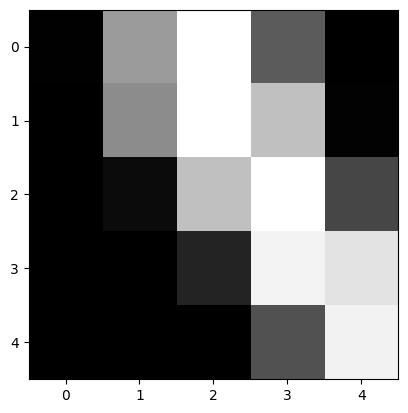

In [44]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [45]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [46]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds, batch_size)

In [47]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [48]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0161,  0.0035,  0.0320,  ..., -0.0029,  0.0336, -0.0281],
        [-0.0166, -0.0276, -0.0049,  ..., -0.0137, -0.0050,  0.0238],
        [-0.0112,  0.0046, -0.0229,  ..., -0.0157,  0.0295,  0.0225],
        ...,
        [ 0.0224, -0.0228,  0.0175,  ..., -0.0162,  0.0224, -0.0167],
        [-0.0170, -0.0029, -0.0244,  ..., -0.0219,  0.0270,  0.0281],
        [-0.0198, -0.0076,  0.0239,  ...,  0.0260, -0.0231, -0.0204]],
       requires_grad=True)

In [51]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([9, 0, 9, 3, 1, 9, 0, 1, 0, 7, 1, 3, 3, 4, 9, 9, 3, 3, 1, 4, 7, 6, 4, 3,
        3, 0, 5, 6, 0, 1, 5, 6, 0, 9, 1, 0, 3, 5, 0, 4, 1, 2, 4, 9, 9, 3, 2, 3,
        2, 3, 0, 9, 3, 6, 0, 0, 2, 6, 4, 4, 0, 7, 4, 5, 9, 2, 5, 0, 7, 1, 6, 2,
        2, 7, 0, 4, 1, 4, 1, 0, 5, 2, 9, 8, 0, 3, 2, 4, 3, 1, 9, 1, 6, 4, 8, 0,
        1, 7, 6, 4, 2, 5, 7, 5, 4, 0, 1, 1, 2, 7, 0, 7, 6, 6, 4, 8, 4, 5, 9, 8,
        4, 4, 3, 0, 8, 5, 5, 8])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [54]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)
  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [55]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [56]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0299,  0.0346, -0.0164,  ..., -0.0260, -0.0342, -0.0311],
         [ 0.0223, -0.0085,  0.0115,  ..., -0.0285,  0.0291,  0.0124],
         [-0.0099, -0.0148, -0.0046,  ..., -0.0326,  0.0352,  0.0163],
         ...,
         [-0.0201, -0.0292, -0.0144,  ..., -0.0307, -0.0246, -0.0313],
         [ 0.0306, -0.0090,  0.0229,  ..., -0.0117, -0.0344, -0.0259],
         [ 0.0069,  0.0195,  0.0101,  ...,  0.0332,  0.0084, -0.0192]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0171, -0.0027,  0.0044, -0.0097,  0.0161, -0.0304, -0.0308, -0.0345,
         -0.0264, -0.0247], requires_grad=True)]

In [58]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1963, -0.0198,  0.0706,  0.1305,  0.0565, -0.1633, -0.3369, -0.0719,
         -0.1339, -0.0293],
        [-0.0851,  0.0196, -0.0527,  0.1002,  0.0577, -0.0586, -0.2323,  0.1088,
          0.0510,  0.0414]])


In [59]:
import torch.nn.functional as F

In [61]:
outputs[:2]

tensor([[-0.1963, -0.0198,  0.0706,  0.1305,  0.0565, -0.1633, -0.3369, -0.0719,
         -0.1339, -0.0293],
        [-0.0851,  0.0196, -0.0527,  0.1002,  0.0577, -0.0586, -0.2323,  0.1088,
          0.0510,  0.0414]], grad_fn=<SliceBackward0>)

In [65]:
props = F.softmax(outputs, dim=1)
print("Sample Probabilities :\n ", props[:2].data)
print("Sum : ",torch.sum(probs[0]).item())

Sample Probabilities :
  tensor([[0.0873, 0.1042, 0.1140, 0.1211, 0.1124, 0.0902, 0.0759, 0.0989, 0.0929,
         0.1032],
        [0.0919, 0.1020, 0.0949, 0.1106, 0.1060, 0.0943, 0.0793, 0.1115, 0.1053,
         0.1043]])
Sum :  1.0000001192092896


In [67]:
max_probs, preds = torch.max(props, dim=1)
print(preds)
print(max_probs)

tensor([3, 7, 3, 4, 8, 0, 8, 7, 4, 3, 0, 4, 3, 7, 7, 9, 7, 8, 7, 4, 3, 4, 3, 4,
        5, 4, 8, 0, 5, 3, 4, 1, 4, 4, 5, 3, 4, 3, 5, 4, 4, 8, 7, 3, 4, 7, 8, 3,
        3, 5, 3, 3, 0, 4, 3, 5, 2, 4, 3, 3, 3, 0, 3, 8, 7, 0, 2, 3, 4, 0, 8, 3,
        3, 4, 8, 0, 5, 4, 5, 9, 5, 5, 4, 1, 0, 5, 5, 0, 5, 5, 3, 4, 5, 3, 4, 8,
        4, 4, 2, 4, 3, 3, 3, 7, 3, 2, 4, 3, 7, 8, 4, 3, 7, 4, 4, 3, 3, 7, 7, 4,
        4, 3, 3, 3, 7, 3, 3, 3])
tensor([0.1211, 0.1115, 0.1381, 0.1227, 0.1288, 0.1178, 0.1179, 0.1276, 0.1259,
        0.1217, 0.1115, 0.1275, 0.1375, 0.1164, 0.1231, 0.1158, 0.1198, 0.1245,
        0.1200, 0.1270, 0.1179, 0.1128, 0.1265, 0.1245, 0.1251, 0.1193, 0.1242,
        0.1216, 0.1266, 0.1275, 0.1297, 0.1345, 0.1385, 0.1263, 0.1231, 0.1264,
        0.1113, 0.1224, 0.1355, 0.1270, 0.1384, 0.1240, 0.1267, 0.1217, 0.1323,
        0.1347, 0.1172, 0.1214, 0.1267, 0.1297, 0.1436, 0.1225, 0.1277, 0.1500,
        0.1142, 0.1309, 0.1299, 0.1557, 0.1417, 0.1264, 0.1297, 0.1294, 0.1308,
       

In [68]:
labels

tensor([7, 7, 0, 0, 1, 1, 3, 4, 3, 1, 5, 3, 8, 9, 9, 8, 4, 3, 4, 3, 8, 9, 1, 3,
        2, 9, 8, 1, 3, 8, 3, 2, 4, 5, 1, 6, 3, 1, 4, 6, 6, 2, 0, 2, 3, 0, 2, 8,
        1, 2, 3, 5, 9, 5, 1, 7, 7, 0, 6, 2, 5, 9, 0, 8, 2, 9, 0, 0, 3, 1, 5, 5,
        9, 0, 7, 9, 6, 0, 6, 1, 1, 6, 0, 6, 2, 2, 6, 9, 8, 7, 8, 5, 6, 1, 0, 2,
        9, 4, 7, 0, 8, 0, 7, 4, 7, 7, 0, 8, 2, 3, 0, 1, 4, 5, 2, 5, 5, 9, 4, 5,
        0, 4, 5, 8, 4, 3, 1, 1])

In [69]:
outputs[:2]

tensor([[-0.1963, -0.0198,  0.0706,  0.1305,  0.0565, -0.1633, -0.3369, -0.0719,
         -0.1339, -0.0293],
        [-0.0851,  0.0196, -0.0527,  0.1002,  0.0577, -0.0586, -0.2323,  0.1088,
          0.0510,  0.0414]], grad_fn=<SliceBackward0>)

In [70]:
torch.sum(preds == labels)

tensor(7)

In [71]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [72]:
accuracy(outputs, labels)

tensor(0.0547)

In [73]:
probs

tensor([[0.0873, 0.1042, 0.1140,  ..., 0.0989, 0.0929, 0.1032],
        [0.0919, 0.1020, 0.0949,  ..., 0.1115, 0.1053, 0.1043],
        [0.1057, 0.0837, 0.0987,  ..., 0.0726, 0.1039, 0.0949],
        ...,
        [0.0976, 0.0812, 0.0756,  ..., 0.0844, 0.1155, 0.0823],
        [0.1268, 0.0976, 0.0864,  ..., 0.0884, 0.1018, 0.0847],
        [0.1112, 0.1036, 0.0909,  ..., 0.0893, 0.1050, 0.0910]],
       grad_fn=<SoftmaxBackward0>)

In [74]:
outputs

tensor([[-0.1963, -0.0198,  0.0706,  ..., -0.0719, -0.1339, -0.0293],
        [-0.0851,  0.0196, -0.0527,  ...,  0.1088,  0.0510,  0.0414],
        [ 0.0748, -0.1580,  0.0063,  ..., -0.3002,  0.0574, -0.0331],
        ...,
        [-0.0177, -0.2012, -0.2722,  ..., -0.1628,  0.1512, -0.1881],
        [ 0.2250, -0.0371, -0.1595,  ..., -0.1362,  0.0054, -0.1795],
        [ 0.0955,  0.0249, -0.1062,  ..., -0.1232,  0.0385, -0.1052]],
       grad_fn=<AddmmBackward0>)

In [76]:
loss_fn = F.cross_entropy

In [77]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3130, grad_fn=<NllLossBackward0>)


In [78]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [79]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [80]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [81]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.340127944946289, 'val_acc': 0.07505933195352554}

In [82]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9694, val_acc: 0.6251
Epoch [1], val_loss: 1.6945, val_acc: 0.7314
Epoch [2], val_loss: 1.4892, val_acc: 0.7623
Epoch [3], val_loss: 1.3346, val_acc: 0.7847
Epoch [4], val_loss: 1.2160, val_acc: 0.7973


In [83]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1232, val_acc: 0.8065
Epoch [1], val_loss: 1.0490, val_acc: 0.8149
Epoch [2], val_loss: 0.9885, val_acc: 0.8205
Epoch [3], val_loss: 0.9382, val_acc: 0.8244
Epoch [4], val_loss: 0.8958, val_acc: 0.8288


In [84]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8595, val_acc: 0.8336
Epoch [1], val_loss: 0.8281, val_acc: 0.8364
Epoch [2], val_loss: 0.8007, val_acc: 0.8394
Epoch [3], val_loss: 0.7764, val_acc: 0.8417
Epoch [4], val_loss: 0.7549, val_acc: 0.8457


In [85]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7356, val_acc: 0.8479
Epoch [1], val_loss: 0.7181, val_acc: 0.8496
Epoch [2], val_loss: 0.7023, val_acc: 0.8515
Epoch [3], val_loss: 0.6879, val_acc: 0.8530
Epoch [4], val_loss: 0.6747, val_acc: 0.8539


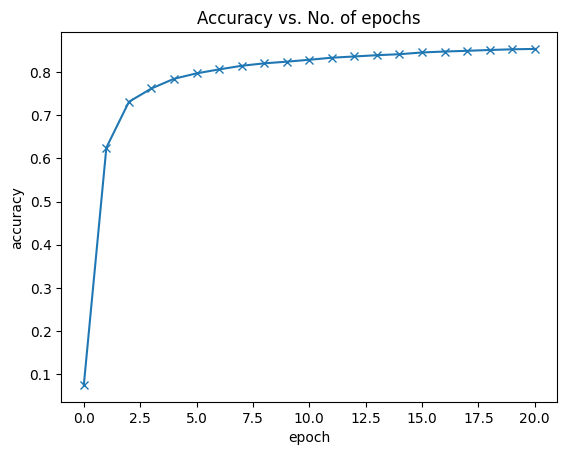

In [86]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [87]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


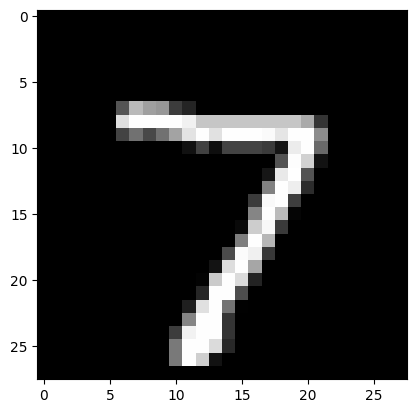

In [88]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [89]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


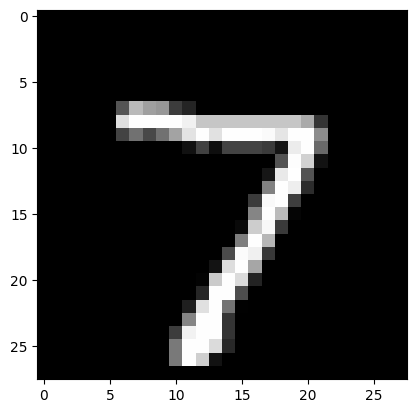

In [90]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [91]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [92]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0220, -0.0046, -0.0045,  ..., -0.0263, -0.0304,  0.0327],
                      [ 0.0214, -0.0191, -0.0081,  ...,  0.0046,  0.0336, -0.0007],
                      [-0.0344,  0.0093,  0.0111,  ..., -0.0341,  0.0027, -0.0173],
                      ...,
                      [ 0.0347,  0.0287,  0.0071,  ..., -0.0153,  0.0248, -0.0331],
                      [ 0.0180,  0.0323, -0.0012,  ...,  0.0252,  0.0322,  0.0094],
                      [ 0.0019,  0.0004, -0.0247,  ..., -0.0236, -0.0076,  0.0321]])),
             ('linear.bias',
              tensor([-0.0275,  0.0979, -0.0134, -0.0430, -0.0071,  0.0227,  0.0063,  0.0132,
                      -0.0863,  0.0248]))])

In [93]:
model2 = MnistModel()

In [94]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0323, -0.0281, -0.0340,  ...,  0.0066,  0.0317,  0.0053],
                      [-0.0344,  0.0138, -0.0350,  ...,  0.0276, -0.0057, -0.0073],
                      [ 0.0357,  0.0163,  0.0339,  ...,  0.0092, -0.0269,  0.0058],
                      ...,
                      [-0.0181, -0.0285, -0.0076,  ...,  0.0308, -0.0052, -0.0029],
                      [ 0.0164,  0.0283,  0.0278,  ...,  0.0115,  0.0318,  0.0034],
                      [ 0.0061, -0.0160, -0.0013,  ...,  0.0315, -0.0245, -0.0308]])),
             ('linear.bias',
              tensor([ 0.0234, -0.0311,  0.0027,  0.0178, -0.0164, -0.0016,  0.0103,  0.0247,
                      -0.0234, -0.0141]))])